In [ ]:
!pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import dependencies
import math
import numpy as np
import matplotlib.pyplot as plt
import rasterio


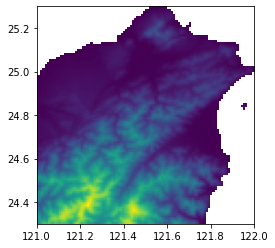

In [ ]:
# load image (topo)
img = rasterio.open("dtm_taipei_100_100.tiff")
topo = img.read(1)
rasterio.plot.show(img)


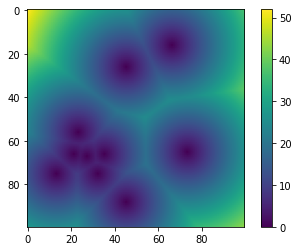

In [ ]:
# dis array
dis = np.zeros(shape=(100,100))
for i in range(100):
  for j in range(100):
    dis[i][j] = 10000
city = [[13,25],[45,74],[27,33],[73,35],[23,44],[45,12],[21,34],[35,34],[66,84],[32,25]]
for k in range(10):
  for i in range(100):
    for j in range(100):
      tmp = math.sqrt((100-city[k][1]-i)**2+(city[k][0]-j)**2)
      if tmp <= dis[i][j]:
        dis[i][j] = math.sqrt((100-city[k][1]-i)**2+(city[k][0]-j)**2)
plt.imshow(dis)
plt.colorbar()


In [ ]:
# crop1 array
crop1 = np.zeros(shape=(100,100))
for i in range(100):
  for j in range(100):
    crop1[i][j] = 10*6 - 4*5 - 10*2 - 2*(topo[i][j]*0.01 + dis[i][j])


In [ ]:
#crop2 array
crop2 = np.zeros(shape=(100,100))
for i in range(100):
  for j in range(100):
    crop2[i][j] = 20*5 - 4*10 - 10*2 - 0.5*((topo[i][j]*0.01 + dis[i][j])**2)


In [ ]:
#crop3 array
crop3 = np.zeros(shape=(100,100))
for i in range(100):
  for j in range(100):
    crop3[i][j] = 30*5 - 4*10 - 10*2 - 15*(topo[i][j]*0.01 + dis[i][j])


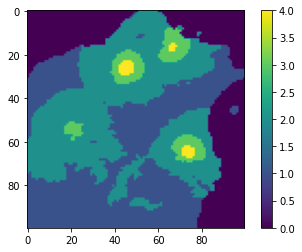

In [ ]:
# combine crops with c_value (crop map)
crops = [crop1,crop2,crop3]
crop_map = np.zeros(shape=(100,100))
crop = np.zeros(shape=(100,100))
for i in range(100):
  for j in range(100):
    crop[i][j] = -10000
for k in range(3):
  for i in range(100):
    for j in range(100):
      if crops[k][i][j] >= crop[i][j]:
        crop[i][j] = crops[k][i][j]
        if topo[i][j] > 0:
          crop_map[i][j] = 1
        if crop[i][j] >= -25 and topo[i][j] > 0:
          crop_map[i][j] = k+2
plt.imshow(crop_map)
plt.colorbar()


[0, 0, 404]


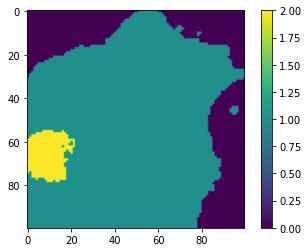

In [ ]:
# count each city
dis_each = np.zeros(shape=(100,100))
city_each = [13,25]
for i in range(100):
  for j in range(100):
    dis_each[i][j] = math.sqrt((100-city_each[1]-i)**2+(city_each[0]-j)**2)
crop1_each = np.zeros(shape=(100,100))
for i in range(100):
  for j in range(100):
    crop1_each[i][j] = 10*6 - 4*5 - 10*2 - 2*(topo[i][j]*0.01 + dis_each[i][j])
crop2_each = np.zeros(shape=(100,100))
for i in range(100):
  for j in range(100):
    crop2_each[i][j] = 20*5 - 4*10 - 10*2 - 0.5*((topo[i][j]*0.01 + dis_each[i][j])**2)
crop3_each = np.zeros(shape=(100,100))
for i in range(100):
  for j in range(100):
    crop3_each[i][j] = 30*5 - 4*10 - 10*2 - 15*(topo[i][j]*0.01 + dis_each[i][j])
crops_each = [crop1_each,crop2_each,crop3_each]
crop_map_each = np.zeros(shape=(100,100))
crop_each = np.zeros(shape=(100,100))
for i in range(100):
  for j in range(100):
    crop_each[i][j] = -10000
for k in range(3):
  for i in range(100):
    for j in range(100):
      if crops_each[k][i][j] >= crop_each[i][j]:
        crop_each[i][j] = crops_each[k][i][j]
        if topo[i][j] > 0:
          crop_map_each[i][j] = 1
        if crop_each[i][j] >= -25 and topo[i][j] > 0:
          crop_map_each[i][j] = k+2
crop1_num = 0
crop2_num = 0
crop3_num = 0
for i in range(100):
  for j in range(100):
    if crop_map_each[i][j] == 4:
      crop3_num += 1
    if crop_map_each[i][j] == 3:
      crop2_num += 1
    if crop_map_each[i][j] == 2:
      crop1_num += 1
plt.imshow(crop_map_each)
plt.colorbar()
print([crop3_num,crop2_num,crop1_num])


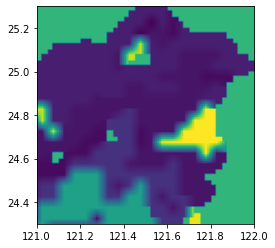

In [ ]:
# load ph
ph_img = rasterio.open("soil_ph_taipei_100_100.tiff")
ph = ph_img.read(1)
rasterio.plot.show(ph_img)


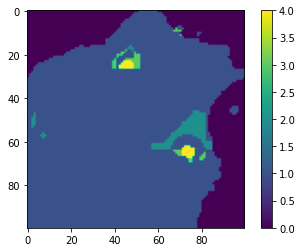

In [ ]:
# add ph condition
ph_crop_map = crop_map
for i in range(100):
  for j in range(100):
    if crop_map[i][j] == 4 and ph[i][j] > 5 and ph[i][j] <= 8.5:
      ph_crop_map[i][j] = 8
    if crop_map[i][j] == 3 and ph[i][j] > 5.5 and ph[i][j] <= 7:
      ph_crop_map[i][j] = 7
    if crop_map[i][j] == 2 and ph[i][j] > 7 and ph[i][j] <= 9.5:
      ph_crop_map[i][j] = 6
for i in range(100):
  for j in range(100):
    if ph_crop_map[i][j] == 4 or ph_crop_map[i][j] == 3 or ph_crop_map[i][j] == 2:
      ph_crop_map[i][j] = 1
for i in range(100):
  for j in range(100):
    if ph_crop_map[i][j] == 8:
      ph_crop_map[i][j] = 4
    if ph_crop_map[i][j] == 7:
      ph_crop_map[i][j] = 3
    if ph_crop_map[i][j] == 6:
      ph_crop_map[i][j] = 2
plt.imshow(ph_crop_map)
plt.colorbar()


[0, 0, 5]


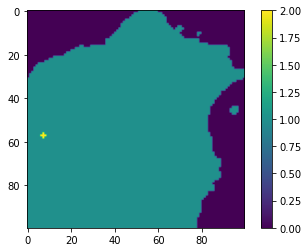

In [ ]:
# count each city with ph
dis_each = np.zeros(shape=(100,100))
city_each = [13,25]
for i in range(100):
  for j in range(100):
    dis_each[i][j] = math.sqrt((100-city_each[1]-i)**2+(city_each[0]-j)**2)
crop1_each = np.zeros(shape=(100,100))
for i in range(100):
  for j in range(100):
    crop1_each[i][j] = 10*6 - 4*5 - 10*2 - 2*(topo[i][j]*0.01 + dis_each[i][j])
crop2_each = np.zeros(shape=(100,100))
for i in range(100):
  for j in range(100):
    crop2_each[i][j] = 20*5 - 4*10 - 10*2 - 0.5*((topo[i][j]*0.01 + dis_each[i][j])**2)
crop3_each = np.zeros(shape=(100,100))
for i in range(100):
  for j in range(100):
    crop3_each[i][j] = 30*5 - 4*10 - 10*2 - 15*(topo[i][j]*0.01 + dis_each[i][j])
crops_each = [crop1_each,crop2_each,crop3_each]
crop_map_each = np.zeros(shape=(100,100))
crop_each = np.zeros(shape=(100,100))
for i in range(100):
  for j in range(100):
    crop_each[i][j] = -10000
for k in range(3):
  for i in range(100):
    for j in range(100):
      if crops_each[k][i][j] >= crop_each[i][j]:
        crop_each[i][j] = crops_each[k][i][j]
        if topo[i][j] > 0:
          crop_map_each[i][j] = 1
        if crop_each[i][j] >= -25 and topo[i][j] > 0:
          crop_map_each[i][j] = k+2
ph_crop_map_each = crop_map_each
for i in range(100):
  for j in range(100):
    if crop_map_each[i][j] == 4 and ph[i][j] > 5 and ph[i][j] <= 8.5:
      ph_crop_map_each[i][j] = 8
    if crop_map_each[i][j] == 3 and ph[i][j] > 5.5 and ph[i][j] <= 7:
      ph_crop_map_each[i][j] = 7
    if crop_map_each[i][j] == 2 and ph[i][j] > 7 and ph[i][j] <= 9.5:
      ph_crop_map_each[i][j] = 6
for i in range(100):
  for j in range(100):
    if ph_crop_map_each[i][j] == 4 or ph_crop_map_each[i][j] == 3 or ph_crop_map_each[i][j] == 2:
      ph_crop_map_each[i][j] = 1
for i in range(100):
  for j in range(100):
    if ph_crop_map_each[i][j] == 8:
      ph_crop_map_each[i][j] = 4
    if ph_crop_map_each[i][j] == 7:
      ph_crop_map_each[i][j] = 3
    if ph_crop_map_each[i][j] == 6:
      ph_crop_map_each[i][j] = 2
crop1_num = 0
crop2_num = 0
crop3_num = 0
for i in range(100):
  for j in range(100):
    if ph_crop_map_each[i][j] == 4:
      crop3_num += 1
    if ph_crop_map_each[i][j] == 3:
      crop2_num += 1
    if ph_crop_map_each[i][j] == 2:
      crop1_num += 1
plt.imshow(ph_crop_map_each)
plt.colorbar()
print([crop3_num,crop2_num,crop1_num])
